# 📷 SRGAN 활용
"SRGAN으로 다양한 이미지를 실험해보는 프로젝트"

## 프로젝트 1 : 직접 고른 이미지로 SRGAN 실험하기

### 프로젝트 1-1.

1. (적당히) 높은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러오기
2. cv2.resize()를 사용해 가로 및 세로 픽셀 수를 1/4로 줄이기
3. SRGAN을 이용해 고해상도 이미지를 생성. apply_srgan 함수 사용
4. bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘리기
5. 4.의 Bicubic의 결과, 3.의 SRGAN의 결과, 1.의 원래 고해상도 이미지 시각화
6. DIV2K 데이터셋에서 학습된 모델로 Super Resolution하고 결과 분석

#### 1. 고해상도 이미지 불러오기

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
import os

이미지크기 :  (194, 259, 3)


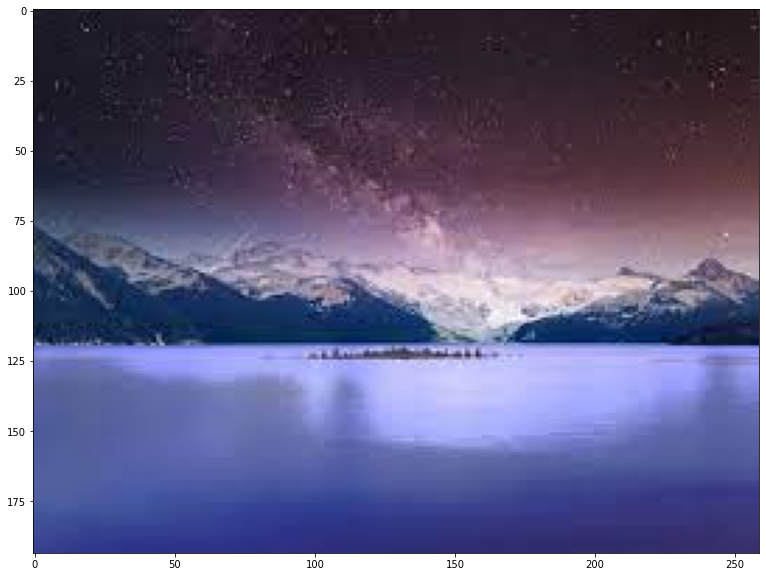

In [2]:
image_path = os.getenv('HOME') + '/aiffel/super_resolution/imo1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print('이미지크기 : ', image.shape)
plt.figure(figsize=(20,10))
plt.imshow(image)

#### 2. 1/4로 크기 줄이기

리사이즈된 이미지크기 :  (48, 64, 3)


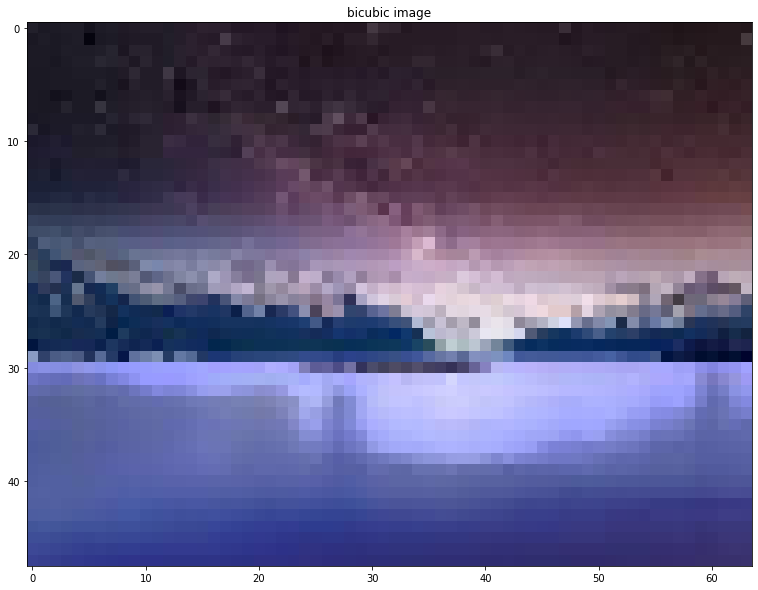

In [3]:
bicubic_lr = cv2.resize(image, dsize=(image.shape[1] // 4,image.shape[0] // 4), interpolation=cv2.INTER_CUBIC) # bicubic interpolation 적용

print('리사이즈된 이미지크기 : ',bicubic_lr.shape)

plt.figure(figsize=(20,10))
plt.title('bicubic image')
plt.imshow(bicubic_lr)

#### 3.  SRGAN을 이용해 고해상도 이미지를 생성

In [4]:
model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [5]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

In [6]:
srgan_hr = apply_srgan(bicubic_lr)

srgan 이미지크기 :  (192, 256, 3)


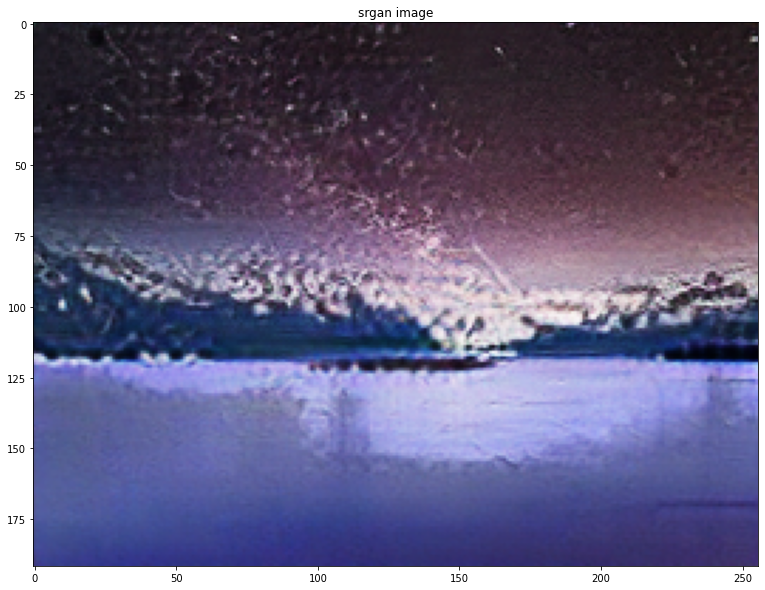

In [7]:
print('srgan 이미지크기 : ',srgan_hr.shape)

plt.figure(figsize=(20,10))
plt.title('srgan image')
plt.imshow(srgan_hr)

#### 4. bicubic interpolation 적용

bicubic: (194, 259, 3)


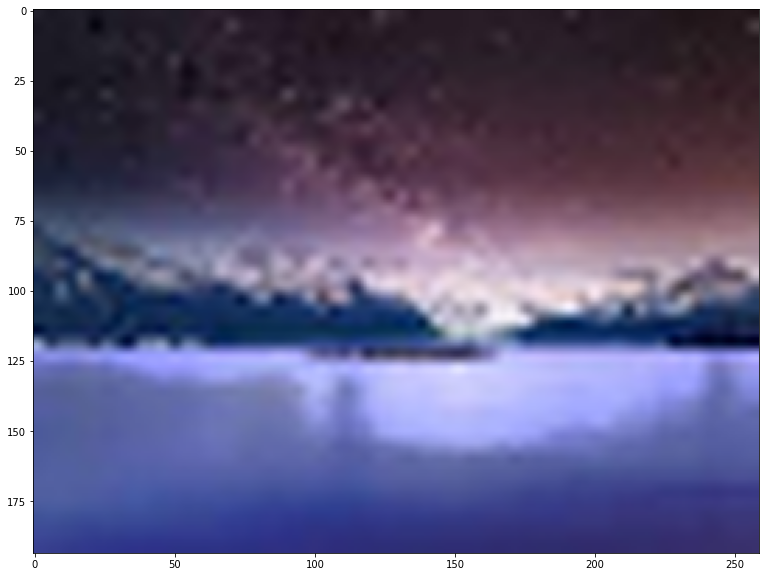

In [8]:
bicubic_hr = cv2.resize(bicubic_lr, dsize=(image.shape[1], image.shape[0]), interpolation=cv2.INTER_CUBIC)
print('bicubic:', bicubic_hr.shape)

plt.figure(figsize=(20,10))
plt.imshow(bicubic_hr)

#### 5.  시각화(4.의 Bicubic의 결과, 3.의 SRGAN의 결과, 1.의 원래 고해상도 이미지)

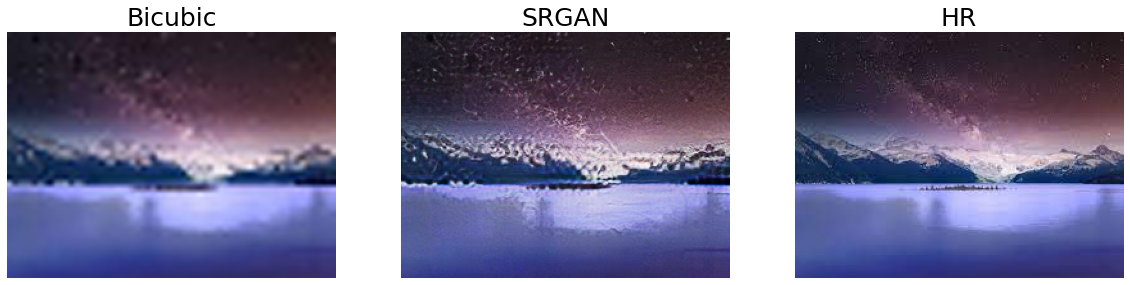

In [9]:
images = [bicubic_hr, srgan_hr, image]
titles = ["Bicubic", "SRGAN", "HR"]

plt.figure(figsize=(20,10))

for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(image)
    plt.title(title, fontsize=25)
    plt.axis('off')

#### 6. 결과 분석

- Bicubic 이미지의 경우, HR 이미지보다 해상도가 많이 떨어지는 것을 알 수 있다.
- SRGAN 이미지의 경우, Bicubic과 비교해서 조금 뚜렷하게 보이나 사진보다는 그림같은 느낌이 든다.


---

### 프로젝트 1-2.

1. (적당히) 낮은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러오기
2. SRGAN을 이용해 고해상도 이미지를 생성. apply_srgan 함수 사용
3. bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘리기
4. 3.의 Bicubic의 결과, 2.의 SRGAN의 결과 시각화
5. DIV2K 데이터셋에서 학습된 모델로 Super Resolution하고 결과 분석

#### 1. 저해상도 이미지 불러오기

이미지크기 :  (280, 496, 3)


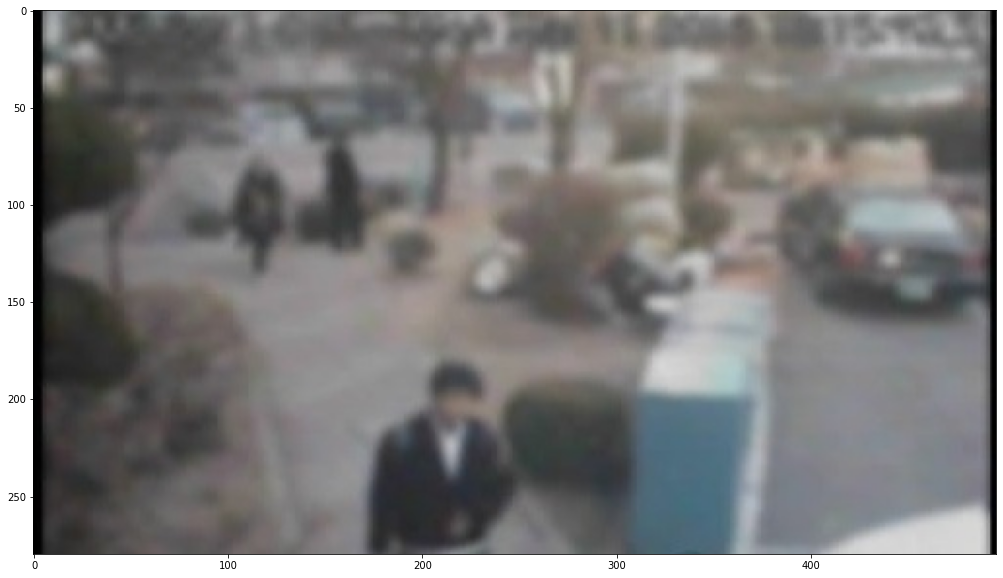

In [13]:
image_path = os.getenv('HOME') + '/aiffel/super_resolution/imo2.jpg'
image2 = cv2.imread(image_path)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
print('이미지크기 : ', image2.shape)
plt.figure(figsize=(20,10))
plt.imshow(image2)

#### 2.  SRGAN을 이용해 고해상도 이미지 생성

In [14]:
bicubic_lr2 = cv2.resize(image2, dsize=(image2.shape[1] // 4,image2.shape[0] // 4), interpolation=cv2.INTER_CUBIC)

In [15]:
srgan_hr2 = apply_srgan(bicubic_lr2)

srgan 이미지크기 :  (280, 496, 3)


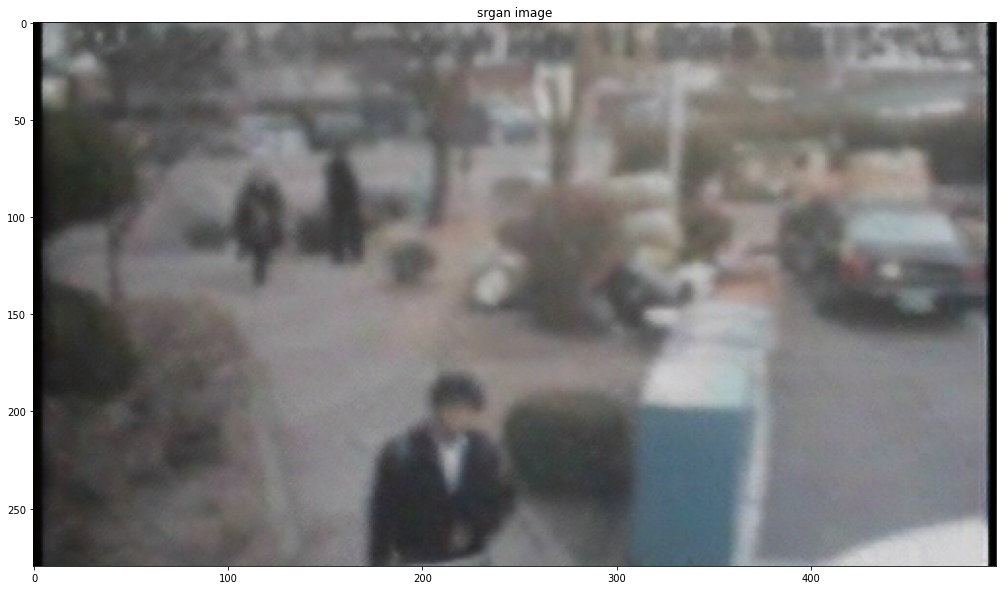

In [16]:
print('srgan 이미지크기 : ',srgan_hr2.shape)

plt.figure(figsize=(20,10))
plt.title('srgan image')
plt.imshow(srgan_hr2)

#### 3. bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 4배로 늘리기

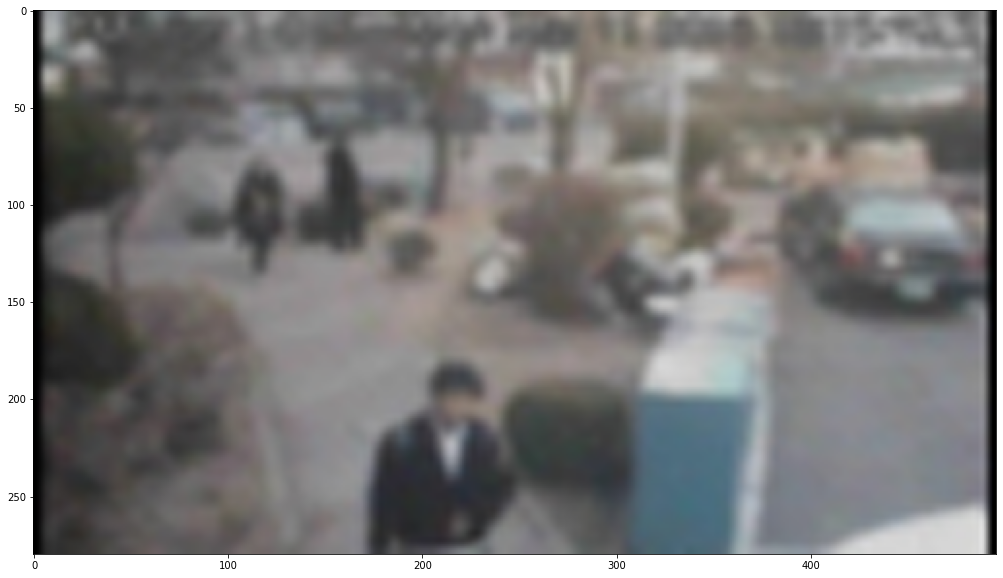

In [17]:
bicubic_hr2 = cv2.resize(bicubic_lr2, dsize=(image2.shape[1], image2.shape[0]), interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(20,10))
plt.imshow(bicubic_hr2)

#### 4. 시각화(3.의 Bicubic의 결과, 2.의 SRGAN의 결과)

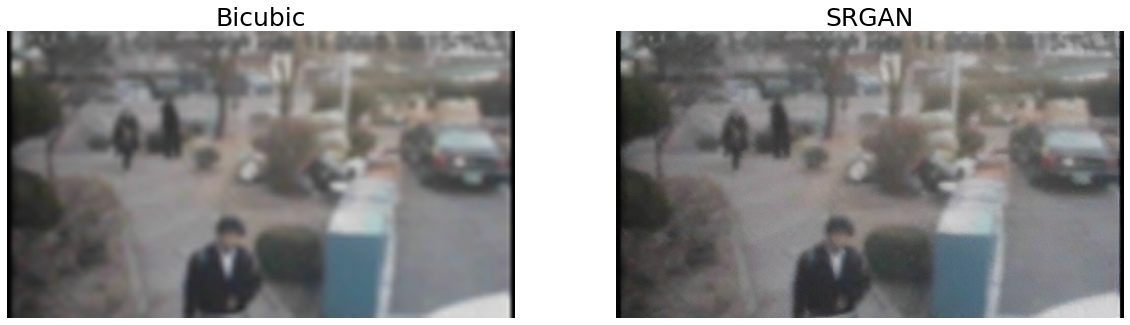

In [18]:
images = [bicubic_hr2, srgan_hr2]
titles = ["Bicubic", "SRGAN"]

plt.figure(figsize=(20,10))

for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,2,i+1)
    plt.imshow(image)
    plt.title(title, fontsize=25)
    plt.axis('off')

#### 5. 결과 분석

- BIcubic 이미지는 흐리게 보인다.
- SRGAN 이미지도 흐려보이지만 조금 나아 보인다.